In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
conn = sqlite3.connect('spotify_song_data.db')
c = conn.cursor()

dfSpotify = pd.read_sql_query("SELECT * FROM song_analysis", conn)
dfSpotify = dfSpotify.dropna()
conn.close()

dfSpotify["rel_year"] = dfSpotify["rel_date"].astype(str).str[:4].astype(int)
dfSpotify = dfSpotify.drop(columns=["rel_date"])

# cut-off date of 1950 is used due to a few errors in the dates of some songs
# Needs some fixing
dfSpotify = dfSpotify.loc[dfSpotify.rel_year > 1950]
dfSpotify.head()

,id,name,artist,explicit,time_signature,key,tempo,mode,duration_ms,danceability,valence,energy,loudness,speechiness,acousticness,instrumentalness,liveness,rel_year
0,6nNED0S6N5oWBmpdM7VCnE,Calling,Groovecatcher,0,4.0,9.0,80.016,0.0,346335,0.517,0.518,0.736,-7.305,0.0323,0.00945,0.019500,0.1270,2006
1,4oWaq1NqE5K3HKCTQhJTnr,Athina-Saloniki me mia papoutsothiki,Imiskoubria,0,4.0,7.0,96.006,1.0,255400,0.893,0.422,0.791,-8.657,0.1920,0.03480,0.000000,0.0748,2008
2,1Yhg8pkTNyzn9lQPUSHed1,Sing The Absurd,The Wonder Stuff,0,3.0,7.0,83.180,1.0,197053,0.337,0.316,0.597,-9.729,0.0335,0.00169,0.000011,0.0757,1993
3,4kZShGNaLMWSfN4MVYXz6A,Donde El Rio Hierve + Perdido En La Ciudad,M-Clan,0,4.0,0.0,109.408,1.0,256333,0.345,0.451,0.943,-5.563,0.2450,0.54700,0.000158,0.9770,2001
4,1p8fQJTQnmSBt5SItyV2Vb,Carolina Moon - Remastered 2013,Thelonious Monk,0,3.0,2.0,92.463,1.0,208640,0.509,0.730,0.498,-8.439,0.0324,0.62200,0.053500,0.1110,2014


In [3]:
# Correlation coefficients for all attributes
dfSpotify.corr()

,explicit,time_signature,key,tempo,mode,duration_ms,danceability,valence,energy,loudness,speechiness,acousticness,instrumentalness,liveness,rel_year
explicit,1.000000,0.018764,0.011706,-0.042693,-0.030689,-0.044326,0.094128,0.032058,0.102409,0.103220,0.294248,-0.098804,-0.087732,0.054372,0.056351
time_signature,0.018764,1.000000,0.011609,0.063576,-0.014296,0.045139,0.187050,0.148094,0.173228,0.144851,-0.003631,-0.165143,-0.026904,-0.007960,0.012160
key,0.011706,0.011609,1.000000,0.001649,-0.180981,0.008091,0.024972,0.021015,0.038671,0.022490,0.024050,-0.034371,0.001477,-0.004044,0.006387
tempo,-0.042693,0.063576,0.001649,1.000000,0.011647,0.014219,-0.079146,0.103346,0.224782,0.172101,-0.032924,-0.190717,0.005504,0.002032,0.021489
mode,-0.030689,-0.014296,-0.180981,0.011647,1.000000,-0.068636,-0.047413,0.022862,-0.044495,-0.008373,-0.040504,0.054270,-0.065541,0.006660,-0.045332
duration_ms,-0.044326,0.045139,0.008091,0.014219,-0.068636,1.000000,-0.000657,-0.175605,0.004900,-0.046144,-0.067638,-0.088623,0.191402,-0.003063,0.034961
danceability,0.094128,0.187050,0.024972,-0.079146,-0.047413,-0.000657,1.000000,0.521528,0.058352,0.114709,0.142026,-0.114226,-0.117483,-0.119126,0.039149
valence,0.032058,0.148094,0.021015,0.103346,0.022862,-0.175605,0.521528,1.000000,0.264900,0.237533,0.059233,-0.145689,-0.237107,-0.008786,-0.069444
energy,0.102409,0.173228,0.038671,0.224782,-0.044495,0.004900,0.058352,0.264900,1.000000,0.761240,0.094012,-0.713532,-0.078859,0.151053,0.134151
loudness,0.103220,0.144851,0.022490,0.172101,-0.008373,-0.046144,0.114709,0.237533,0.761240,1.000000,0.005420,-0.555421,-0.277270,0.066400,0.208963


In [25]:
from scipy import stats

def avg_attr_over_years(attr_name):
    #takes the average for each year and returns a list of tuples (year, average of trait)
    #assert(type(dfSpotify[attr]) in [int, float, complex])
    
    years = list(set(dfSpotify.rel_year.values))

    attr_list = list()
    
    for yr in years:
        dfYr = dfSpotify.loc[dfSpotify.rel_year == yr]
        
        attr_list.append((yr, dfYr[attr_name].mean()))
    
    return attr_list

# print(type(dfSpotify['valence'][1]))
def plotTemporalTraits(traits):
    #takes a list of traits and plots them on a single graph. How to fix scaling issues?
    
    #create lists for all traits
    temp_traits = []
    for t in traits:
        temp_traits.append(avg_attr_over_years(t))
    
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    index = 0
    #plot each trait vs year
    for x in temp_traits:
        yrs = [t[0] for t in x]
        trait = [t[1] for t in x]
        ax.scatter(yrs, trait, alpha = 0.6, label = traits[index])
        index = index + 1;
    plt.legend()
    ax.set_xlabel("Year")
    ax.set_ylabel("Trait Value")
    
def plotTemporalTraitRegression(trait_name):
    
    trait_vs_year = avg_attr_over_years(trait_name)
    
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    index = 0
    
    yrs = [t[0] for t in trait_vs_year]
    trait = [t[1] for t in trait_vs_year]
    
    ax.scatter(yrs, trait, alpha = 0.6, label = trait_name)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(yrs, trait)
    
    x_vals = np.arange(yrs[0],yrs[-1])
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label='SLR', color='coral')
    
    plt.legend()
    ax.set_xlabel("Year")
    ax.set_ylabel("Trait Value")

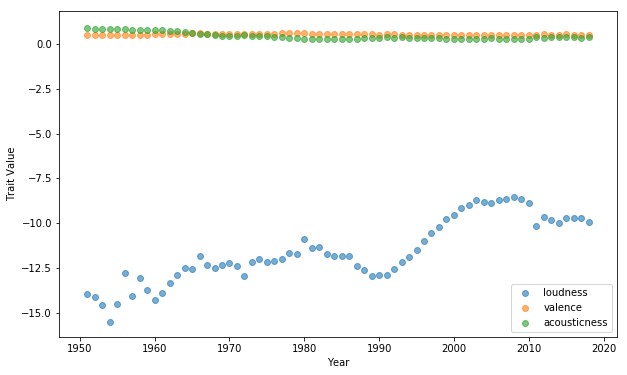

In [26]:
# This graph shows issue with scale of different attributes on the same plot
plotTemporalTraits(['loudness', 'valence', 'acousticness'])

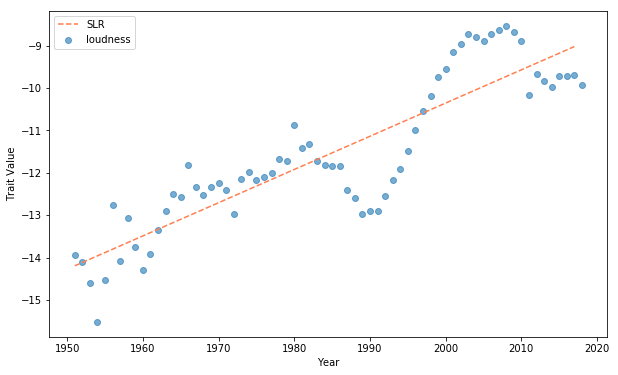

In [27]:
plotTemporalTraitRegression('loudness')